In [24]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR
from img2table.tables.processing.borderless_tables import identify_borderless_tables
from img2table.tables.processing.text.titles import get_title_tables
from colordict import ColorDict
from IPython.display import display_html
import cv2
import numpy as np

In [25]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [64]:
img = Image(r"C:\Users\xavca\Pictures\test_world.jpg")
ocr = TesseractOCR()
ocr_df = ocr.of(img)

img = list(img.images)[0]

In [65]:
tables = identify_borderless_tables(img, ocr_df)
tables = get_title_tables(img=img, tables=tables, ocr_df=ocr_df)
tables = [table.get_content(ocr_df=ocr_df, min_confidence=50)
                           for table in tables]

In [66]:
for idx, table in enumerate(tables):
    display_html(table.extracted_table.html_repr(title=f"Extracted table n°{idx + 1}"), raw=True)

,0,1,2,3,4,5
0,Rank ¢,Country /\n4\nDependency,Population &,of the\nworld,Date,Source (official or from\nthe United Nations)
1,None,China,"1,412,600,000",17.6%,31 Dec 2021,National annual
2,None,=,"1,373,761,000",17.2%,1 Mar 2022,Annual national
3,None,United\nStates,"333,525,708",4.17%,6 Jan 2023,95]\nNational population
4,None,None,"275,773,800",3.45%,1 Jul 2022,National annual
5,None,Pakistan,"229,488,994",2.87%,1 Jul 2022,97]\nUN projection
6,None,B Nigeria,"216,746,934",None,1 Jul 2022,97]\nUN projection
7,None,Brazil,"215,610,645",2.69%,6 Jan 2023,98]\nNational population
8,None,Bangladesh,"168,220,000",2.10%,1 Jul 2020,Annual Population
9,None,Russia,"147,190,000",1.84%,1 Oct 2021,2021 preliminary census


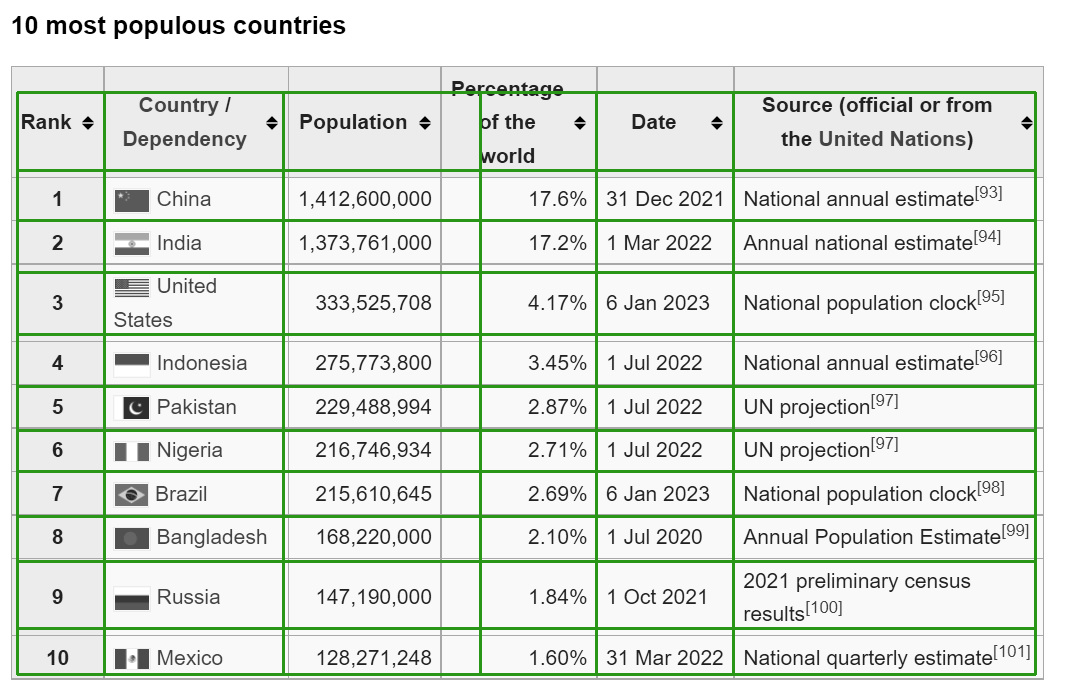

In [67]:
display_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

for table in tables:
    color = get_color()
    for row in table.extracted_table.content.values():
        for cell in row:
            cv2.rectangle(display_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), color, 2)

PILImage.fromarray(display_img)